# 네이버 영화 감성 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('../00.data/github.com/nsmc/ratings_train.txt', sep='\t')
train_data = train_data.head(3000)
train_data.head(1)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0


In [3]:
test_data = pd.read_csv('../00.data/github.com/nsmc/ratings_test.txt', sep='\t')
test_data = test_data.head(1000)
test_data.head(1)

,id,document,label
0,6270596,굳 ㅋ,1


## 데이터 전처리

In [4]:
train_data.shape, test_data.shape

((3000, 3), (1000, 3))

In [5]:
# 중복 여부 확인
train_data['document'].nunique(), test_data['document'].nunique()

(2989, 998)

In [6]:
# 중복 샘플 제거
train_data.drop_duplicates(subset=['document'], inplace=True)
test_data.drop_duplicates(subset=['document'], inplace=True)
train_data.shape, test_data.shape

((2989, 3), (998, 3))

<AxesSubplot:>

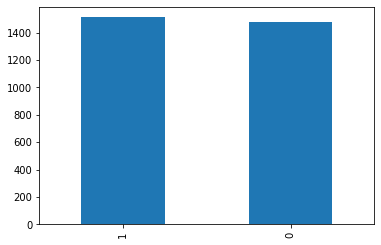

In [7]:
# 긍정, 부정 레이블 값의 분포
train_data['label'].value_counts().plot(kind='bar')

In [8]:
train_data['label'].value_counts()

1    1512
0    1477
Name: label, dtype: int64

In [9]:
# Null값 확인
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [10]:
train_data.loc[train_data['document'].isnull()]

,id,document,label


In [11]:
train_data = train_data.dropna(how='any')
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

## 테스트 데이터 셋

In [12]:
test_data['document'].nunique()

998

In [13]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data.shape

(998, 3)

In [14]:
test_data = test_data.dropna(how='any')
test_data.shape

(998, 3)

## 텍스트 전처리

### 트레인 셋

In [15]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [16]:
train_data['document'].replace('', np.nan, inplace=True)
train_data.isnull().sum()

id           0
document    12
label        0
dtype: int64

In [17]:
# train_data = train_data.dropna(how='any')
train_data = train_data.dropna()
train_data.shape

(2977, 3)

### 테스트 셋

In [18]:
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [19]:
test_data['document'].replace('', np.nan, inplace=True)
test_data.isnull().sum()

id          0
document    9
label       0
dtype: int64

In [20]:
test_data = test_data.dropna()
test_data.shape

(989, 3)

In [58]:
train_data.to_csv('../00.data/github.com/nsmc/train.tsv', sep='\t', index=False)
test_data.to_csv('../00.data/github.com/nsmc/test.tsv', sep='\t', index=False)

## 토큰화

In [21]:
from konlpy.tag import Okt
okt = Okt()

In [22]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도', '을', '를','으로','자','에','와','한','하다']

In [23]:
okt.morphs('교도소 이야기구먼 솔직히 재미는 없다평점 조정')

['교도소', '이야기', '구먼', '솔직히', '재미', '는', '없다', '평점', '조정']

In [24]:
okt.morphs('교도소 이야기구먼 솔직히 재미는 없다평점 조정', stem=True)

['교도소', '이야기', '구먼', '솔직하다', '재미', '는', '없다', '평점', '조정']

In [25]:
from tqdm import tqdm
X_train = []
for sentence in tqdm(train_data['document']):
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = ' '.join([word for word in temp_X if not word in stopwords]) # 불용어 제거
    X_train.append(temp_X)

100%|██████████| 2977/2977 [00:38<00:00, 77.60it/s]


In [26]:
from tqdm import tqdm
X_test = []
for sentence in tqdm(test_data['document']):
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = ' '.join([word for word in temp_X if not word in stopwords]) # 불용어 제거
    X_test.append(temp_X)

100%|██████████| 989/989 [00:09<00:00, 105.44it/s]


In [27]:
y_train = train_data['label'].values
y_test = test_data['label'].values

## CountVectorizer, LogisticRegression

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
hv = HashingVectorizer()
hv.fit(X_train)
X_train_vec = hv.transform(X_train)
X_test_vec = hv.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='saga')
lr.fit(X_train_vec, y_train)
pred = lr.predict(X_test_vec)
accuracy_score(y_test, pred)

0.7613751263902933

## 실제 테스트

In [42]:
# 부정
review = "진짜 개노잼이다.. 1편이랑 같은 감독맞나?러닝타임도 길어서 개지루함 ㄹㅇ"

In [43]:
import re
review = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', str(review))
review

'진짜 개노잼이다 편이랑 같은 감독맞나러닝타임도 길어서 개지루함 ㄹㅇ'

In [44]:
morphs = okt.morphs(review)
review = ' '.join([word for word in morphs if not word in stopwords])
review

'진짜 개 노잼 이다 편이 랑 같은 감독 맞나 러닝 타임 길어서 개 지루함 ㄹㅇ'

In [45]:
review_hv = hv.transform([review])

In [46]:
pred = lr.predict(review_hv)
pred[0]

0

In [49]:
# 긍정
review = "이런 사랑영화가 다시 나올 수 있을까?"
review = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', str(review))
morphs = okt.morphs(review)
review = ' '.join([word for word in morphs if not word in stopwords])
review_hv = hv.transform([review])
pred = lr.predict(review_hv)
pred[0]

1

In [56]:
reviews = [
    "진짜 개노잼이다.. 1편이랑 같은 감독맞나?러닝타임도 길어서 개지루함 ㄹㅇ",
    "이런 사랑영화가 다시 나올 수 있을까?"
]
for review in reviews:
    review = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', str(review))
    morphs = okt.morphs(review)
    review = ' '.join([word for word in morphs if not word in stopwords])
    review_hv = hv.transform([review])
    pred = lr.predict(review_hv)
    print(pred[0], review)

0 진짜 개 노잼 이다 편이 랑 같은 감독 맞나 러닝 타임 길어서 개 지루함 ㄹㅇ
1 이런 사랑 영화 다시 나올 수 있을까
